## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

## Reading in Data 

In [2]:
df = pd.read_csv('../datasets/subs2.csv', encoding='utf-8')


In [3]:
df.head()

,title,self_text,subreddit,text_words
0,Looking for Costa Rican Spanish speakers for a...,hey guys! i'm a linguistics phd student and i'...,0,123
1,Traveling to CR as a tica...,hi! i am costa_rican-american but have never b...,0,167
2,Puerto Viejo,"sunset pic on the caribbean coast, thanks to s...",0,11
3,Bought a bed. They made it right in front of me!,nice craftsmanship and impressed they built an...,0,26
4,How can I give back to Costa Rica?,"hi, if i move to costa_rica part time as an am...",0,36


## Reading in Custom Stopwords


In [4]:
stopwords_df = pd.read_csv('../datasets/custom_stopwords.csv')
stopwords_new = stopwords_df['custom_stopwords'].tolist()
stopwords = stopwords.words('english')
stopwords_custom = stopwords +stopwords_new

## Setting up Data 

In [5]:
X= df['self_text']
y=df['subreddit']

## Train Test Split 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Gridsearch with Random Forest

In [7]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
     ])

In [8]:
params = {
    'cvec__stop_words' : [None, "english", stopwords_custom],
    'cvec__ngram_range': [(1,1), (1,2), (2,2)],
    'rf__bootstrap': [True, False],
    'rf__max_depth': [4, 7, 10],
    'rf__n_jobs': [8]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]],
                         'rf__bootstrap': [True, False],
                         'rf__max_depth': [4, 7, 10], 'rf__n_jobs': [8]})

In [9]:
print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Train: 0.6674491392801252
Test: 0.6208920187793427


In [10]:
gs.best_params_

{'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'rf__bootstrap': False,
 'rf__max_depth': 10,
 'rf__n_jobs': 8}

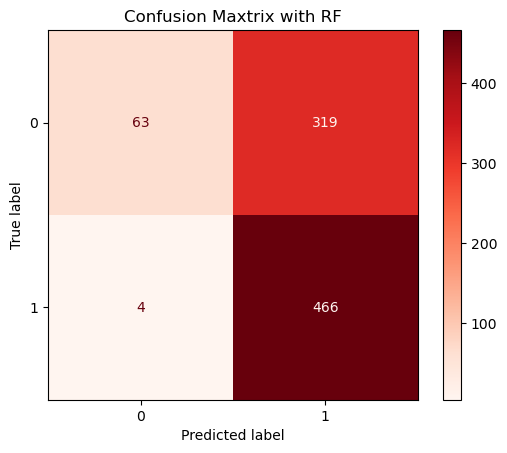

In [11]:
preds = gs.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap=plt.cm.Reds)
plt.title("Confusion Maxtrix with RF");
plt.savefig('../pictures/Confusion Maxtrix with RF.png', format='png')

## Which features had the most importance

In [12]:
s1= gs.best_estimator_.named_steps['cvec'].get_feature_names_out()
s2 = (gs.best_estimator_.named_steps['rf'].feature_importances_)

In [13]:
df_feature_importance = pd.DataFrame({'feature_name': s1, 'importance' : s2})

In [14]:
df_feature_importance.sort_values('importance', ascending=False)[:30]

,feature_name,importance
10341,que,0.031017
13436,un,0.021188
9847,por,0.020314
13014,to,0.017330
7330,la_fortuna,0.012507
11715,si,0.012310
13437,una,0.012268
9290,para,0.012210
13283,trip,0.011380
4882,es,0.010973


There are some obvious words here that help to determin class.  It appears that Spanish words help to determin a tourist.  As does La Fortuna (a big tourist city). Words like for, we, too, and the are on the list as helping to find determination.  This was surprising to me as they are generally stopwords, but perhaps the contradiction of these and their spanish counterparts is why they were so helpful.  